## 04 데이터 전처리 - encoding, scaling

## [ 데이터 인코딩 ]

### 1. 레이블 인코딩 (Label encoding)

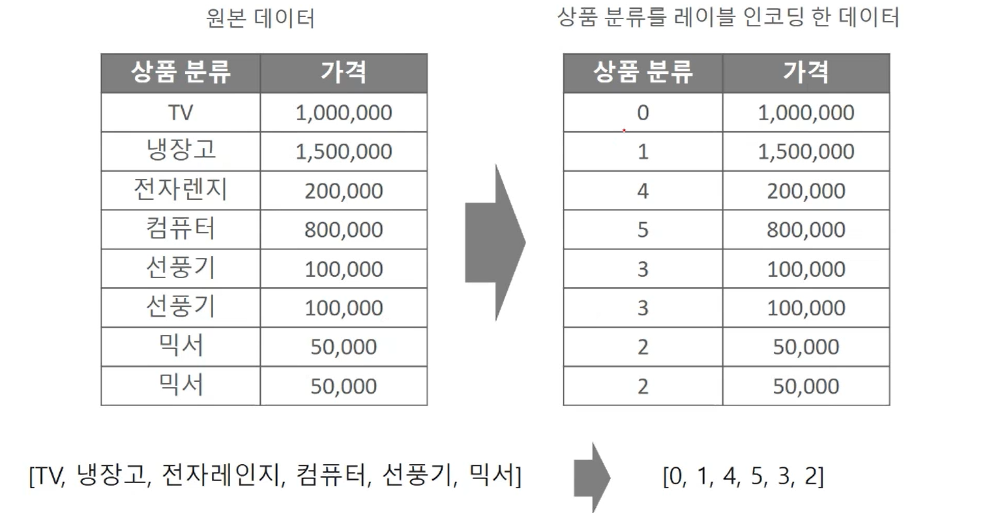

In [1]:
from sklearn.preprocessing import LabelEncoder

items = ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

# LabelEncoder 객체 생성
encoder = LabelEncoder() 

# label 인코딩 수행
encoder.fit(items)
labels = encoder.transform(items)

print("인코딩 변환 값: ", labels)

인코딩 변환 값:  [0 1 4 5 3 3 2 2]


In [2]:
print("인코딩 클래스: ", encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [3]:
print("디코딩 원본 값: ", encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값:  ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


### 2. 원-핫 인코딩 (One-Hot encoding)

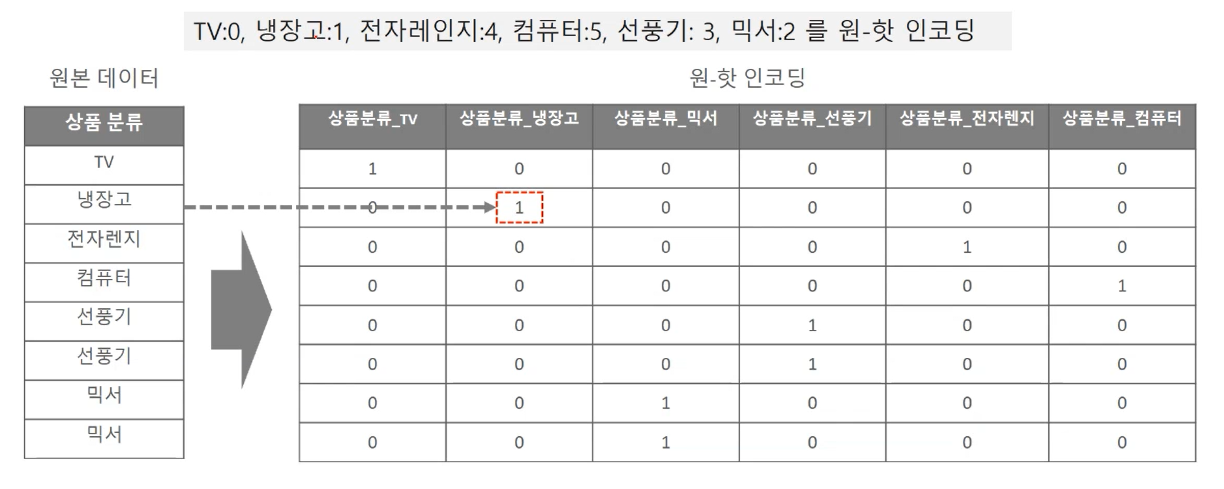

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

# 숫자값으로 변환하기 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# One-Hot 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print("One-Hot encoding 데이터")
print(oh_labels.toarray())

print("\nOne-Hot encoding 데이터 차원")
print(oh_labels.shape)

One-Hot encoding 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

One-Hot encoding 데이터 차원
(8, 6)


In [7]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [8]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## [ feature scaling ]

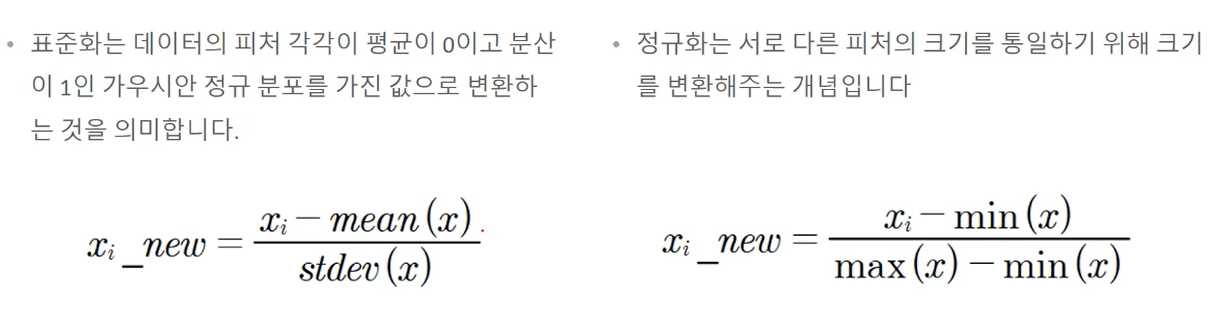

### 1. 표준화 (StandardScaler)

#### *평균이 0이고, 분산이 1인 정규 분포 형태로 변환*

In [11]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names) # DataFrame으로 변환

print("feature들의 평균 값")
print(iris_df.mean())

print("\nfeature들의 분산 값")
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [14]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transfrom()시 scale된 데이터 세트가 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature들의 평균 값")
print(iris_df_scaled.mean())

print("feature들의 분산 값")
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### 2. MinMaxScaler

#### *데이터값을 0과 1사이의 범위 값으로 변환합니다. (음수는 -1에서 1값으로 변환 )*

In [21]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler으로 데이터 세트 변환
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale된 데이터 세트가 numpy ndarray로 반환되어 이를 DataFrame을 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
